# Comparing Frequency Distributions

The data set is about basketball players in WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the season 2016-2017.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wnba = pd.read_csv("wnba.csv")

In [4]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [13]:
def make_exp_ordinal(row):
    try:
        if int(row['Experience']) == 0:
            return 'Rookie'
        if (1 <= int(row['Experience']) <=  3):
            return 'Little experience'
        if (4 <= int(row['Experience']) <=  5):
            return 'Experienced'
        if (5 <= int(row['Experience']) < 10):
            return 'Very experienced'
        if 10 < int(row['Experience']):
            return 'Veteran'
    except:
        pass

In [14]:
wnba['Exp_ordinal'] = wnba.apply(make_exp_ordinal, axis = 1)

In [15]:
wnba['Exp_ordinal'].head(10)

0    Little experience
1              Veteran
2          Experienced
3     Very experienced
4                 None
5                 None
6                 None
7     Very experienced
8    Little experience
9          Experienced
Name: Exp_ordinal, dtype: object

In [16]:
rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']

rookie_distro = rookies['Pos'].value_counts()
little_xp_distro = little_xp['Pos'].value_counts()
experienced_distro = experienced['Pos'].value_counts()
very_xp_distro = very_xp['Pos'].value_counts()
veteran_distro = veterans['Pos'].value_counts()

print(rookie_distro, '\n\n', little_xp_distro, '\n\n', experienced_distro, '\n\n', very_xp_distro, '\n\n', veteran_distro)

Series([], Name: Pos, dtype: int64) 

 G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64 

 G      9
C      6
F      6
G/F    2
F/C    2
Name: Pos, dtype: int64 

 G      15
F       6
C       5
G/F     4
F/C     2
Name: Pos, dtype: int64 

 G      7
F      4
G/F    3
F/C    1
C      1
Name: Pos, dtype: int64


### Grouped Bar Plots

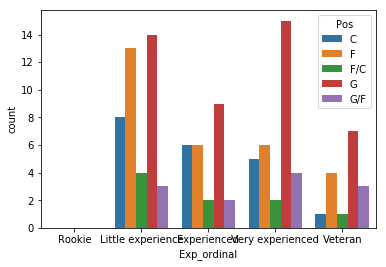

In [18]:
sns.countplot(x = 'Exp_ordinal',
              hue = 'Pos',
              data = wnba,
              order = ['Rookie', 'Little experience', 'Experienced', 'Very experienced', 'Veteran'],
              hue_order = ['C', 'F', 'F/C', 'G', 'G/F'])

In [19]:
wnba['MIN'].mean()

496.97202797202794

In [20]:
wnba['Age'].mean()

27.076923076923077

In [23]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')

In [24]:
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else 'below average')

In [26]:
wnba['age_mean_relative'].head()

0    young
1      old
2    young
3      old
4    young
Name: age_mean_relative, dtype: object

In [27]:
wnba['min_mean_relative'].head()

0       below average
1    average or above
2    average or above
3    average or above
4       below average
Name: min_mean_relative, dtype: object

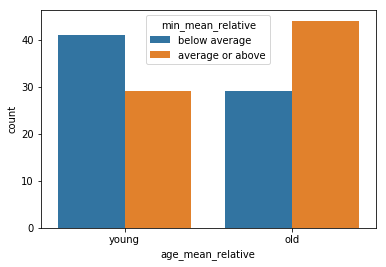

In [25]:
sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', data = wnba)

### Comparing Histograms

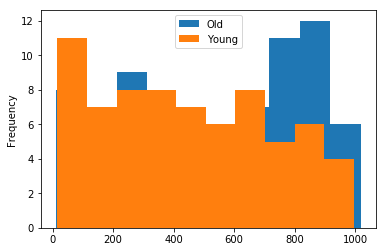

In [29]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)

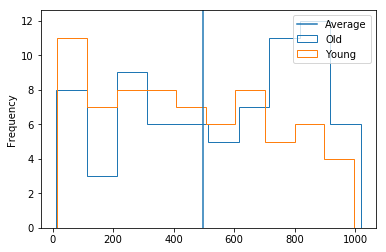

In [31]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(x=497,label='Average')
plt.legend()

### Kernel Density Estimate Plots

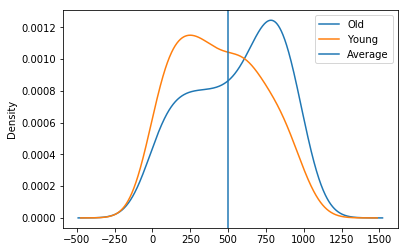

In [33]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(x=497,label='Average')
plt.legend()

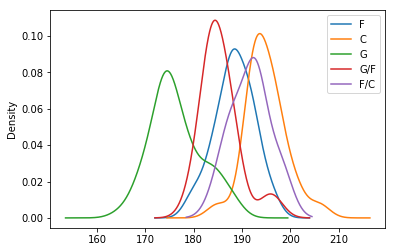

In [35]:
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)

### Strip Plots

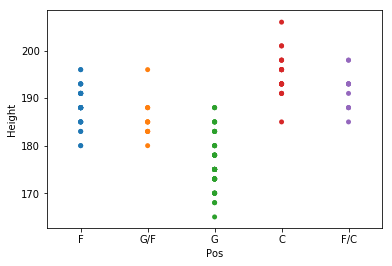

In [36]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba)

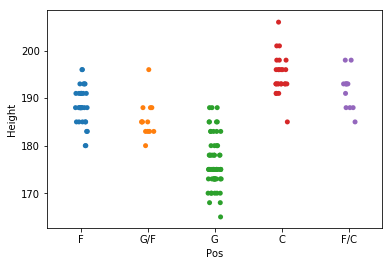

In [37]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter = True)

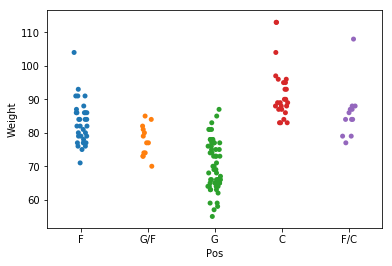

In [38]:
sns.stripplot(x = 'Pos', y = 'Weight', data = wnba, jitter = True)

### Box plots

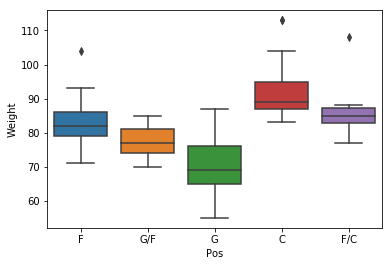

In [39]:
sns.boxplot(x = 'Pos', y = 'Weight', data = wnba)

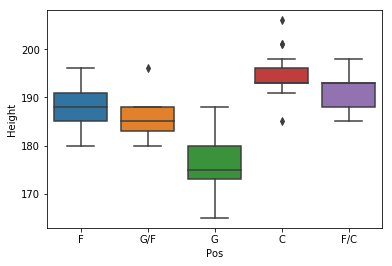

In [40]:
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)

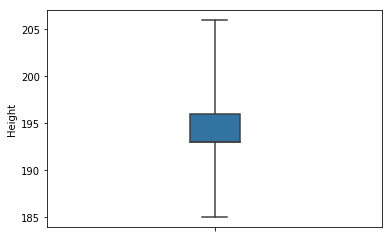

In [41]:
sns.boxplot(wnba[wnba['Pos'] == 'C']['Height'], whis = 4, orient = 'vertical', width = .15)

In [42]:
wnba['Games Played'].describe()

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

In [44]:
#interquartile range

iqr = 29 - 22

In [45]:
lower_bound = 22 - iqr * 1.5
upper_bound = 29 + iqr * 1.5
outliers_low = sum(wnba['Games Played'] < lower_bound)
outliers_high = sum(wnba['Games Played'] > upper_bound)

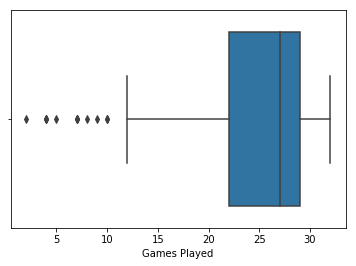

In [46]:
sns.boxplot(wnba['Games Played'])